In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
method_lst = ['sst', 'scnnprop', 'daps', 'sparseprop', 'bofrag'] #'apt']
dataset = 'thumos14'

# Defining plot style
def scale_rgb(rgb):
    return np.array(rgb)/255.0

METHODS = {'apt': {'label': 'APT',
                   'color': scale_rgb([255,255,51]),
                   'linestyle': '-'},
           'bofrag': {'label': 'BoFrag',
                      'color': scale_rgb([228,26,28]),
                      'linestyle': '-'},
           'sparseprop': {'label': 'Sparse-prop',
                          'color': scale_rgb([55,126,184]),
                          'linestyle': '-'},
           'scnnprop': {'label': 'SCNN-prop',
                        'color': scale_rgb([255,127,0]),
                        'linestyle': '-'},
           'daps': {'label': 'DAPs',
                    'color': scale_rgb([152,78,163]),
                    'linestyle': '-'},
           'sst': {'label': 'SST',
                   'color': scale_rgb([77,175,74]),
                   'linestyle': '-', 'zorder': 10,
                   'marker': 'o', 'mec': scale_rgb([50,69,29]),
                   'markevery': 0.1, 'markersize': 8, 'mew': 2}
           }


avg_recall_file = 'average_recall.json'
with open(avg_recall_file, 'r') as f:
    average_recall_data = json.load(f)
        
recall_file = 'recall_vs_tiou.json'
with open(recall_file, 'r') as f:
    recall_vs_tiou_data = json.load(f)

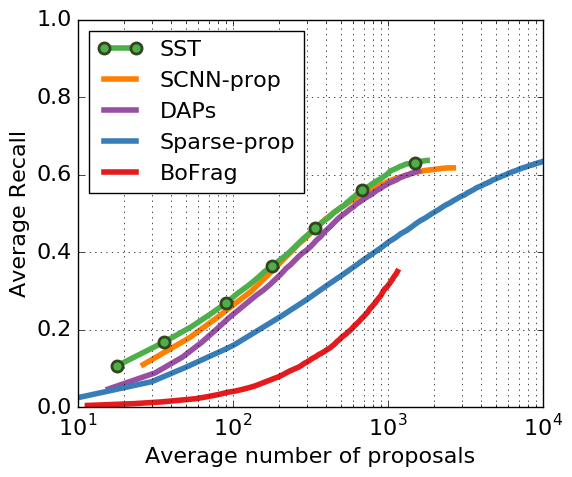

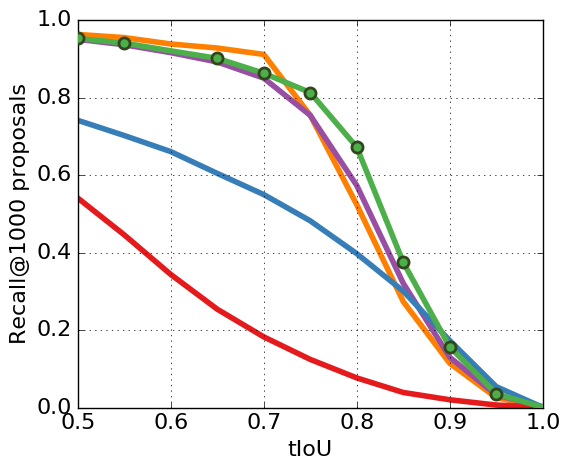

In [3]:
fn_size = 16
plt.figure(num=None, figsize=(6, 5))

# Plot Average Recall curve.
for method_key in method_lst:
    method = METHODS[method_key]
    average_nr_proposals = average_recall_data[method_key]['nr_proposals']
    average_recall = average_recall_data[method_key]['average_recall']
    plt.semilogx(average_nr_proposals, average_recall,
                 linewidth=4, **method)
    
plt.ylabel('Average Recall', fontsize=fn_size)
plt.xlabel('Average number of proposals', fontsize=fn_size)
plt.grid(b=True, which="both")
plt.ylim([0, 1.0])
plt.xlim([10**1, 10**4])
plt.setp(plt.axes().get_xticklabels(), fontsize=fn_size)
plt.setp(plt.axes().get_yticklabels(), fontsize=fn_size)
plt.legend([METHODS[mid]['label'] for mid in method_lst], 
           ncol=1, prop={'size': fn_size}, loc='best') #loc='center left', 
#           bbox_to_anchor=(1, 0.5))
plt.savefig('average_recall.pdf', bbox_inches='tight')
plt.show()

# Plot Recall vs tiou thresholds curve.
plt.figure(num=None, figsize=(6, 5))
for method_key in method_lst:
    method = METHODS[method_key]
    recall = recall_vs_tiou_data[method_key]['recall']
    tiou = recall_vs_tiou_data[method_key]['tiou']
    plt.plot(tiou, recall, linewidth=4, **method)
    
plt.grid(b=True, which="both")
plt.ylabel('Recall@1000 proposals', fontsize=fn_size)
plt.xlabel('tIoU', fontsize=fn_size)    
plt.ylim([0,1])
plt.xlim([0.5,1])
plt.xticks(np.arange(0.5, 1.05, 0.1))
plt.setp(plt.axes().get_xticklabels(), fontsize=fn_size)
plt.setp(plt.axes().get_yticklabels(), fontsize=fn_size)
plt.savefig('recall_vs_tiou.pdf', bbox_inches='tight')
plt.show()
